In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
train <- read_csv('train.csv')
test <- read_csv('test.csv')

Rows: 1460 Columns: 81
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1459 Columns: 80
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (37): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Column Descriptions
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [3]:
data <- bind_rows(train, test)

In [4]:
str(data)
summary(data)

spc_tbl_ [2,919 × 81] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id           : num [1:2919] 1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : num [1:2919] 60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr [1:2919] "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : num [1:2919] 65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : num [1:2919] 8450 9600 11250 9550 14260 ...
 $ Street       : chr [1:2919] "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr [1:2919] NA NA NA NA ...
 $ LotShape     : chr [1:2919] "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr [1:2919] "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr [1:2919] "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr [1:2919] "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr [1:2919] "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr [1:2919] "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr [1:2919] "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr [1:2919] "Norm" "Norm" "Norm" "Norm" ...
 $ Bld

       Id           MSSubClass       MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.00   Length:2919        Min.   : 21.00  
 1st Qu.: 730.5   1st Qu.: 20.00   Class :character   1st Qu.: 59.00  
 Median :1460.0   Median : 50.00   Mode  :character   Median : 68.00  
 Mean   :1460.0   Mean   : 57.14                      Mean   : 69.31  
 3rd Qu.:2189.5   3rd Qu.: 70.00                      3rd Qu.: 80.00  
 Max.   :2919.0   Max.   :190.00                      Max.   :313.00  
                                                      NA's   :486     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:2919        Length:2919        Length:2919       
 1st Qu.:  7478   Class :character   Class :character   Class :character  
 Median :  9453   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10168                                                           
 3rd Qu.: 11570                                          

In [5]:
library(ggplot2)

Warning message:
“Removed 1459 rows containing non-finite values (stat_bin).”


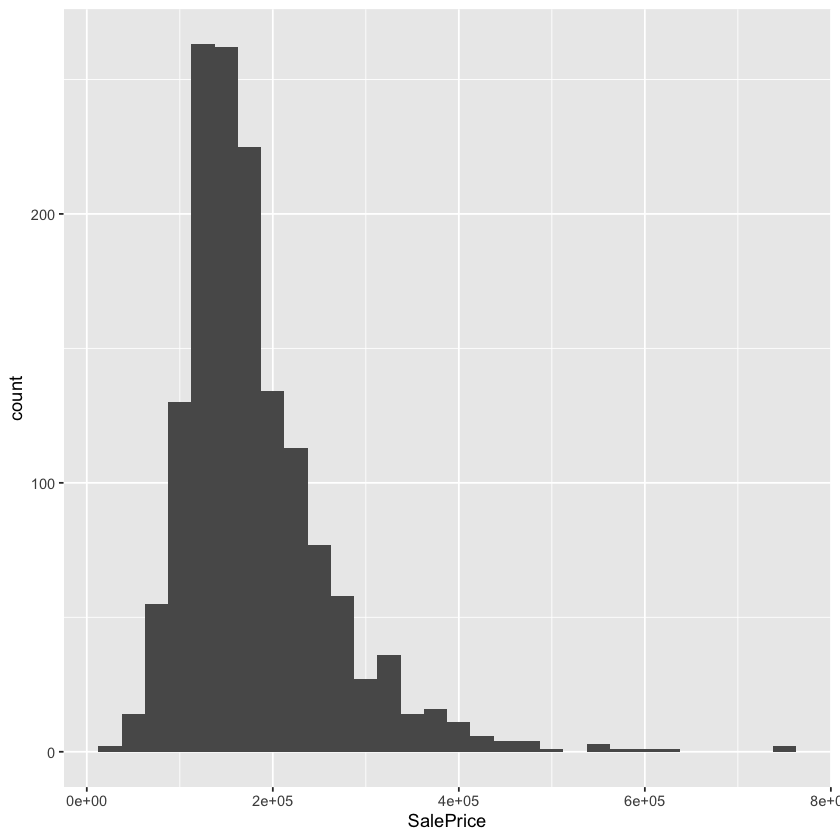

In [6]:
ggplot(data, aes(x = SalePrice)) +
  geom_histogram(binwidth = 25000)

In [7]:
install.packages("gridExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



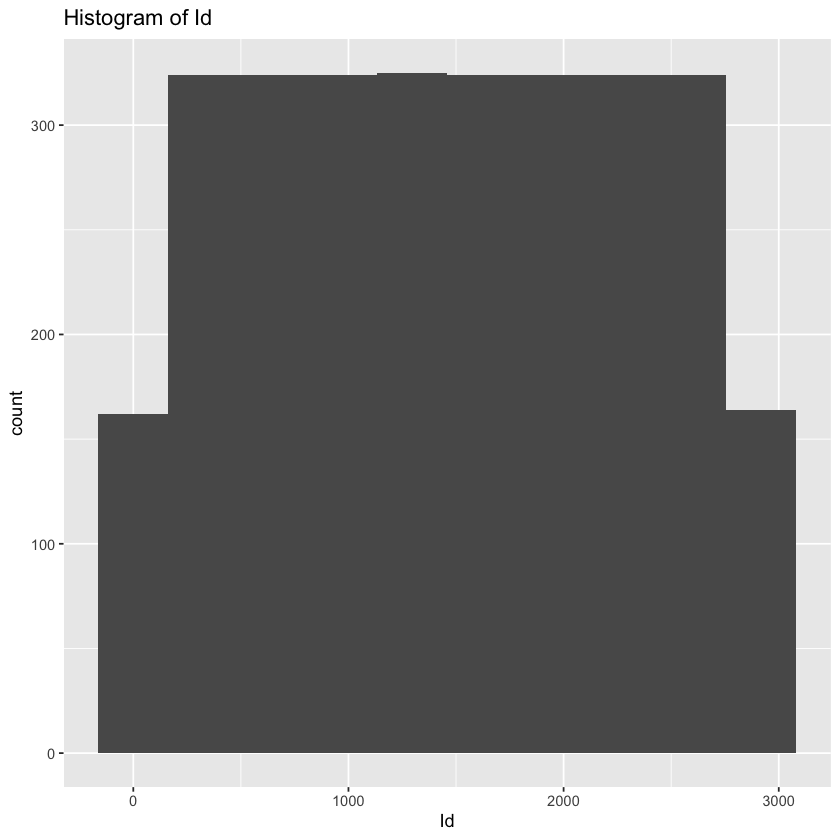

Warning message:
“Removed 486 rows containing non-finite values (stat_bin).”


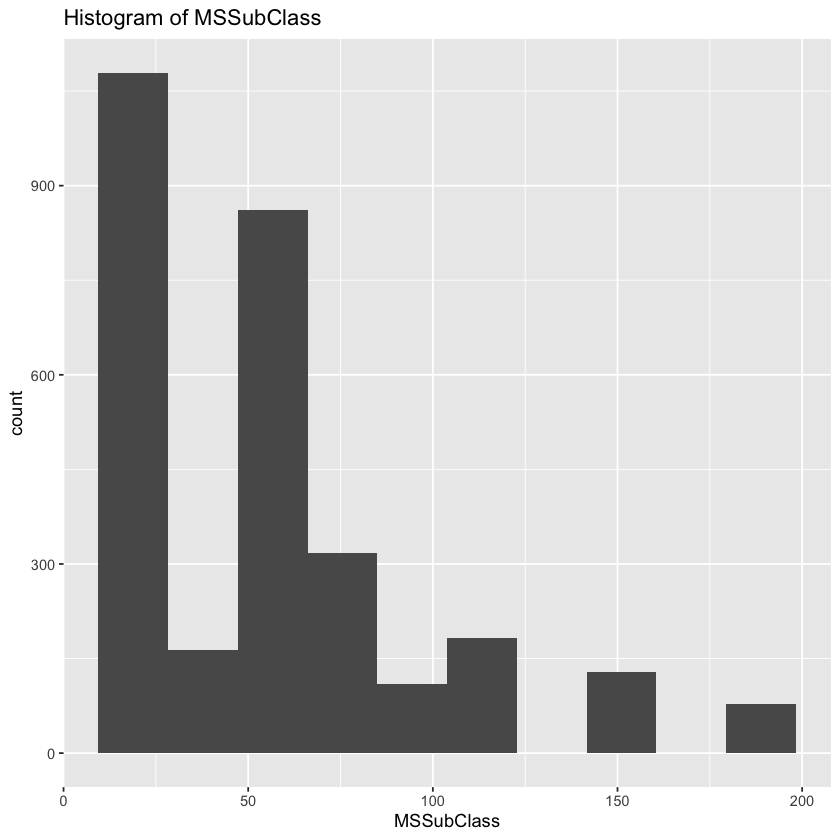

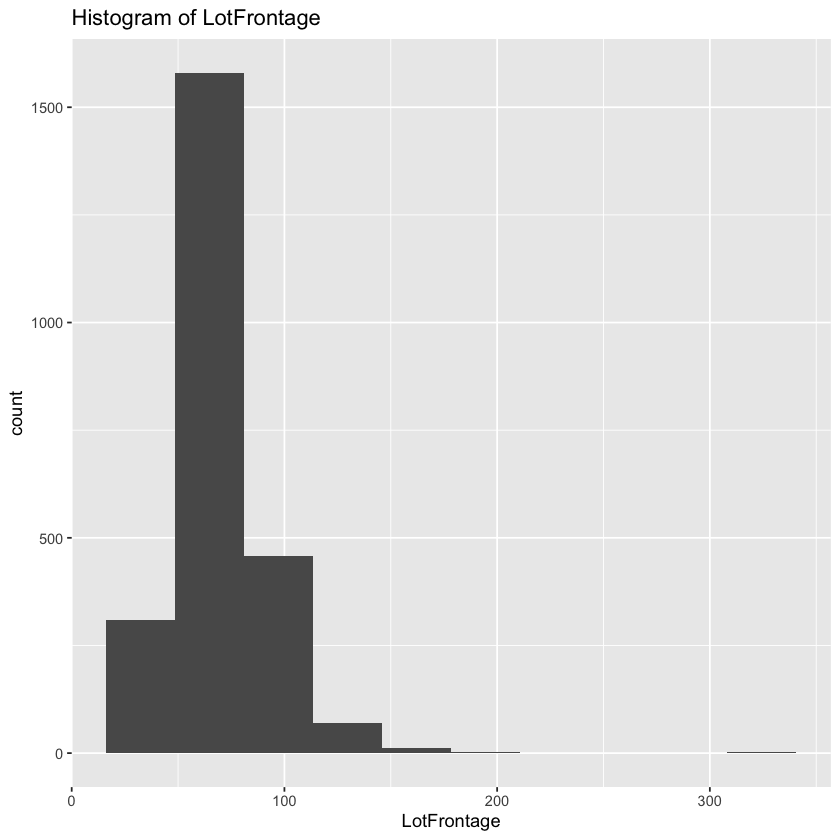

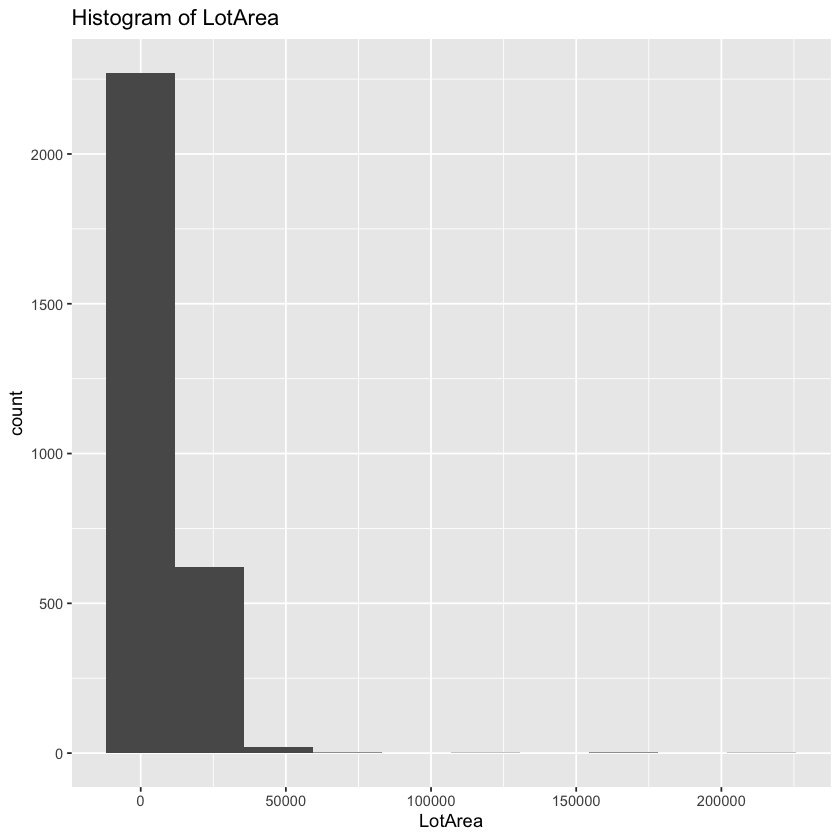

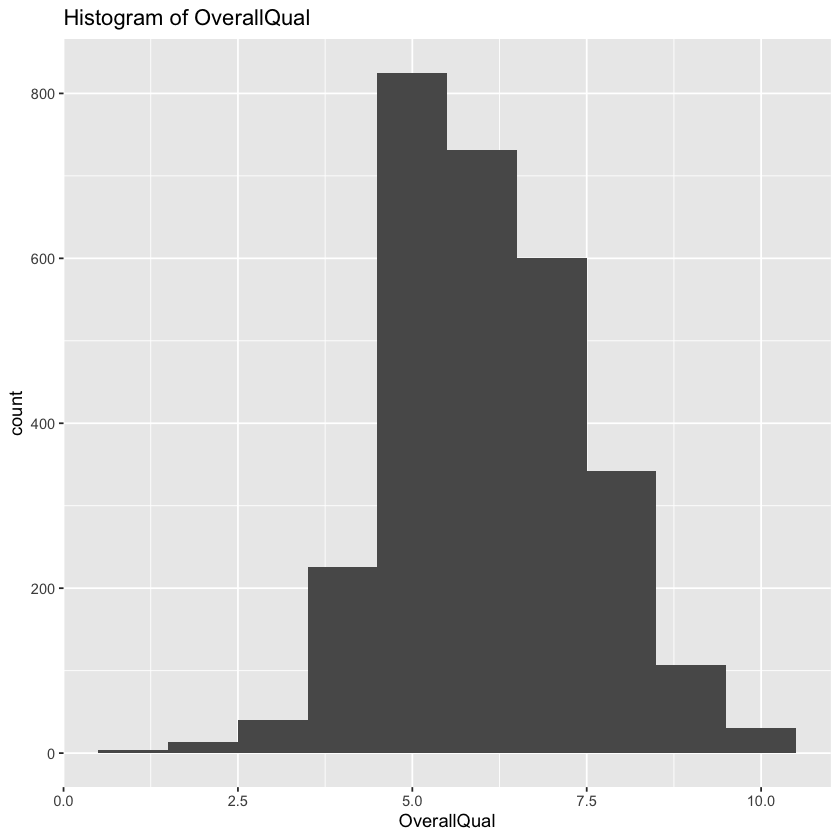

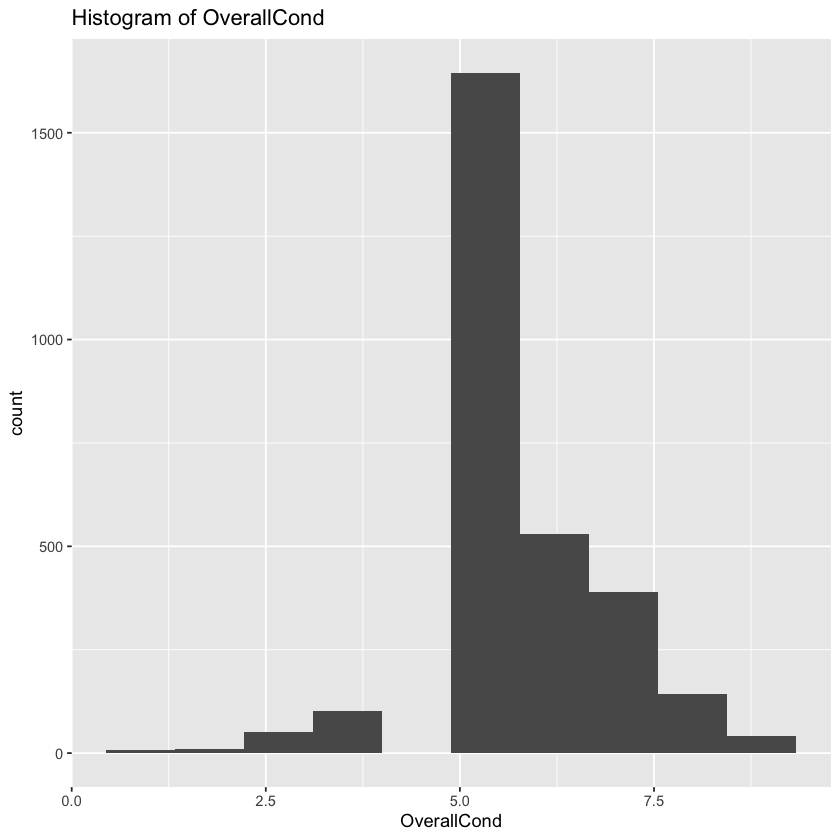

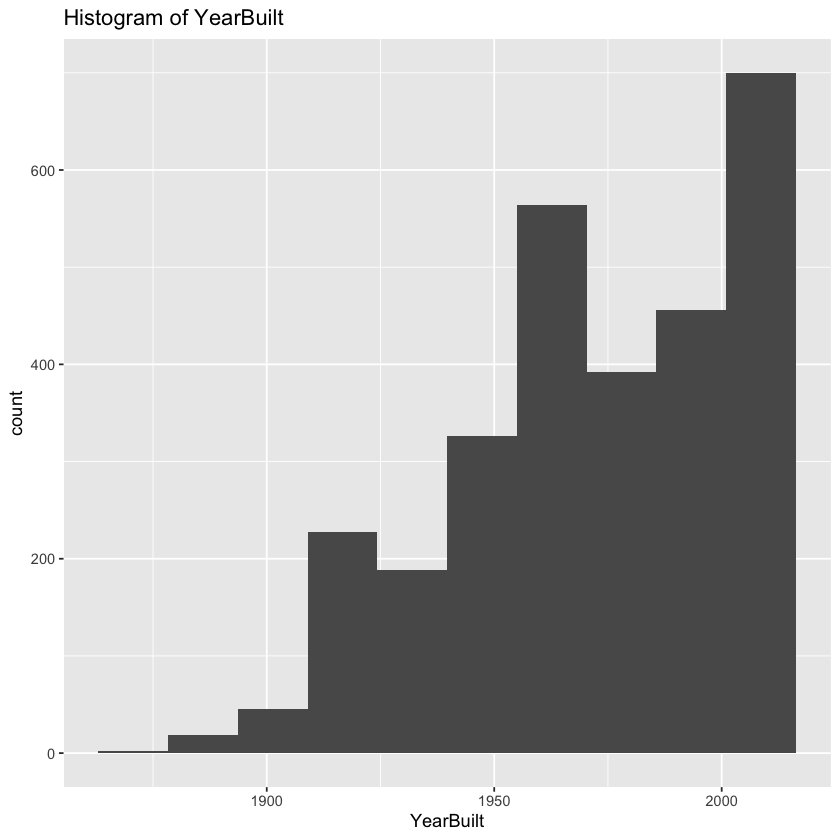

Warning message:
“Removed 23 rows containing non-finite values (stat_bin).”


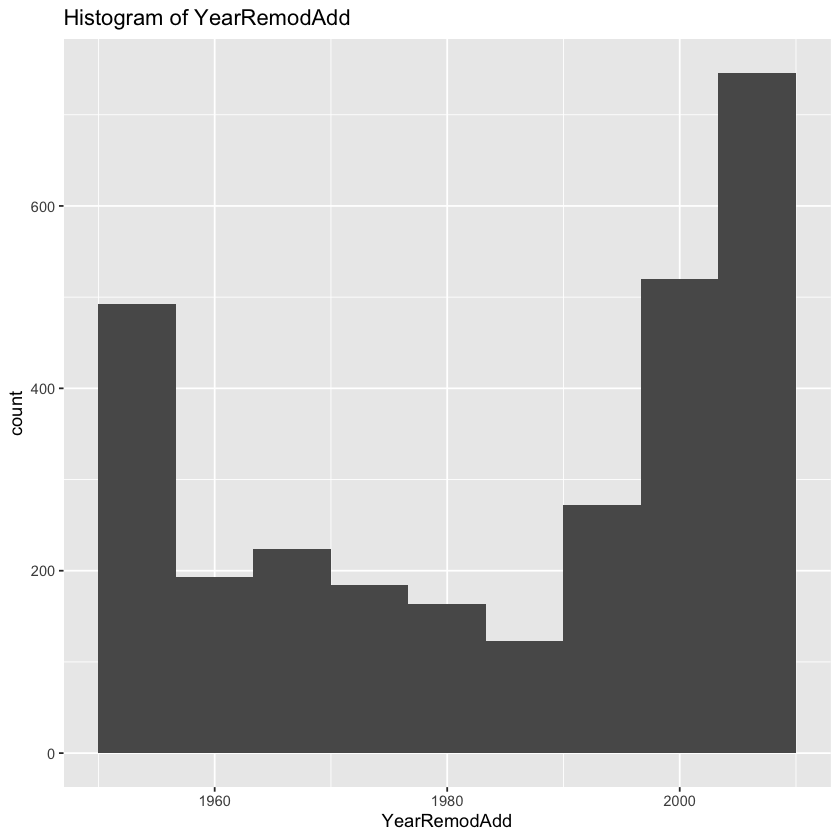

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


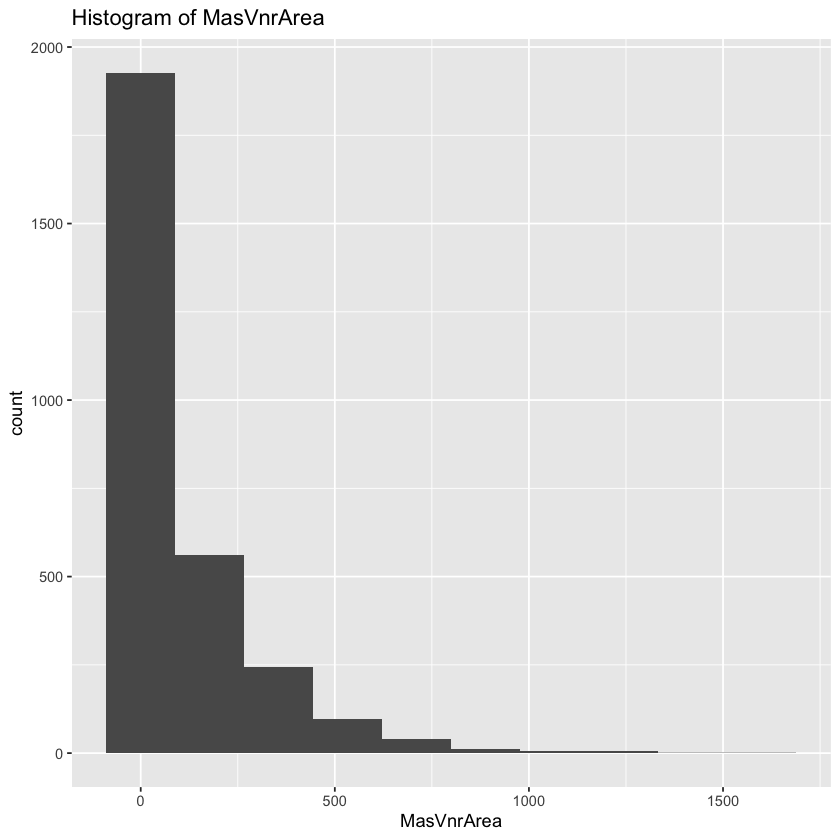

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


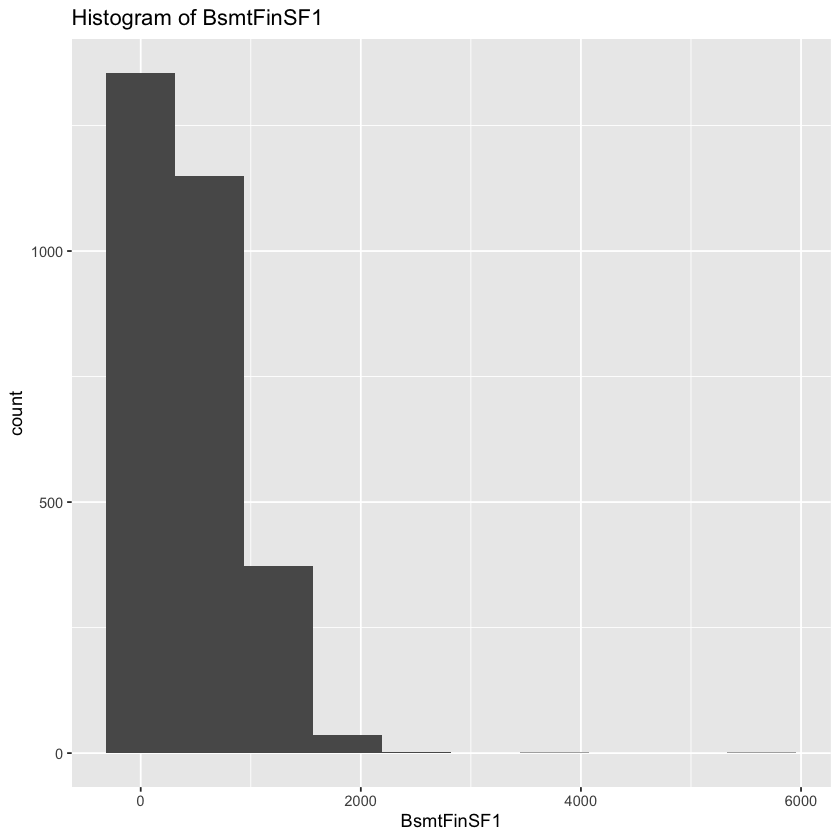

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


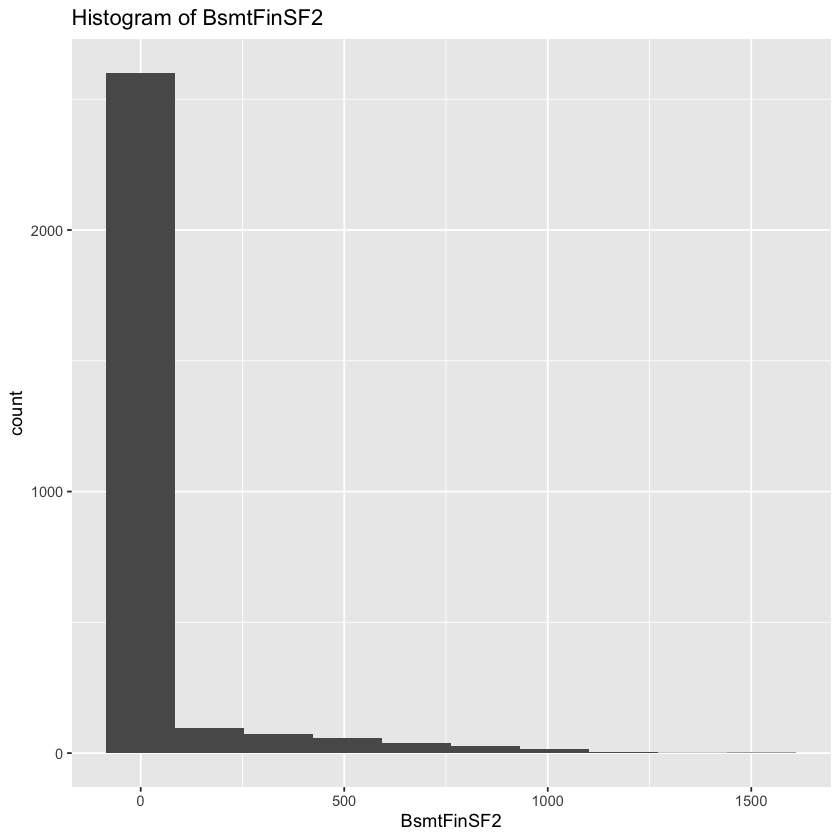

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


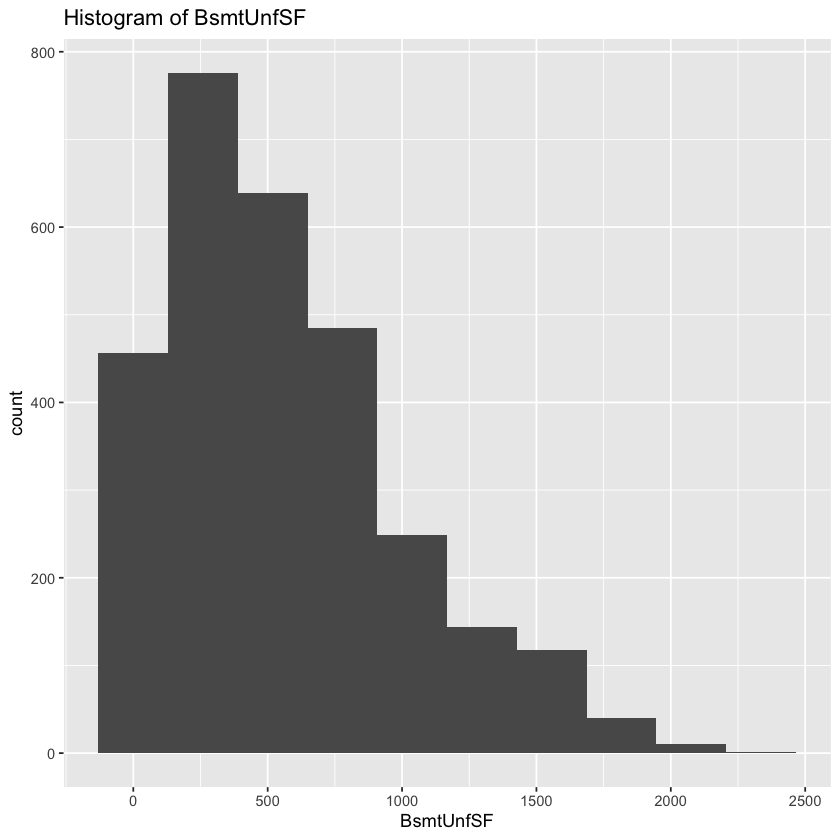

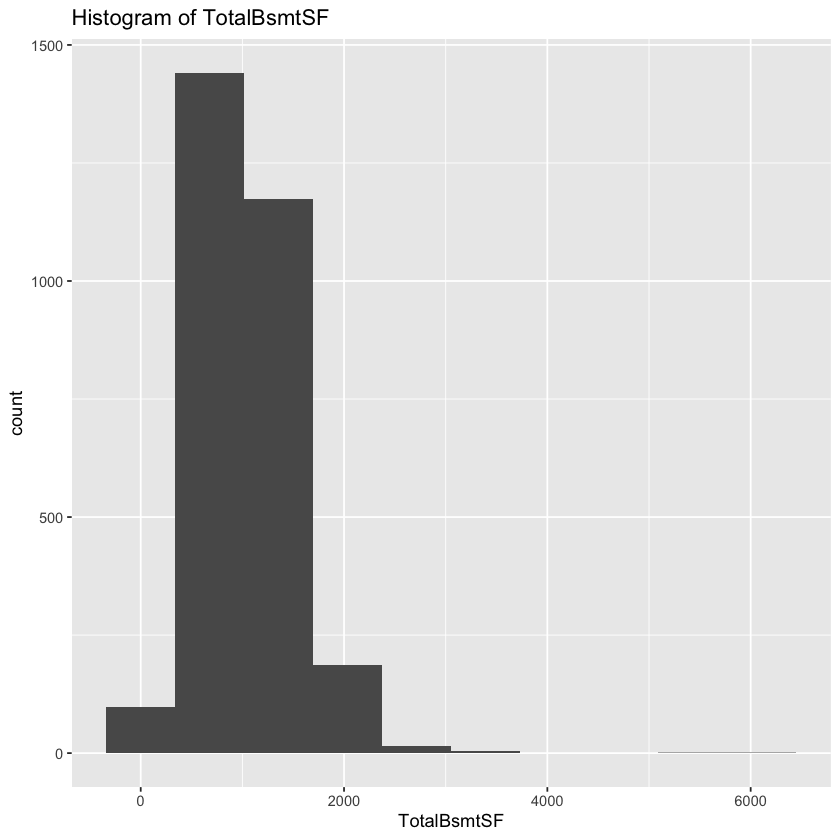

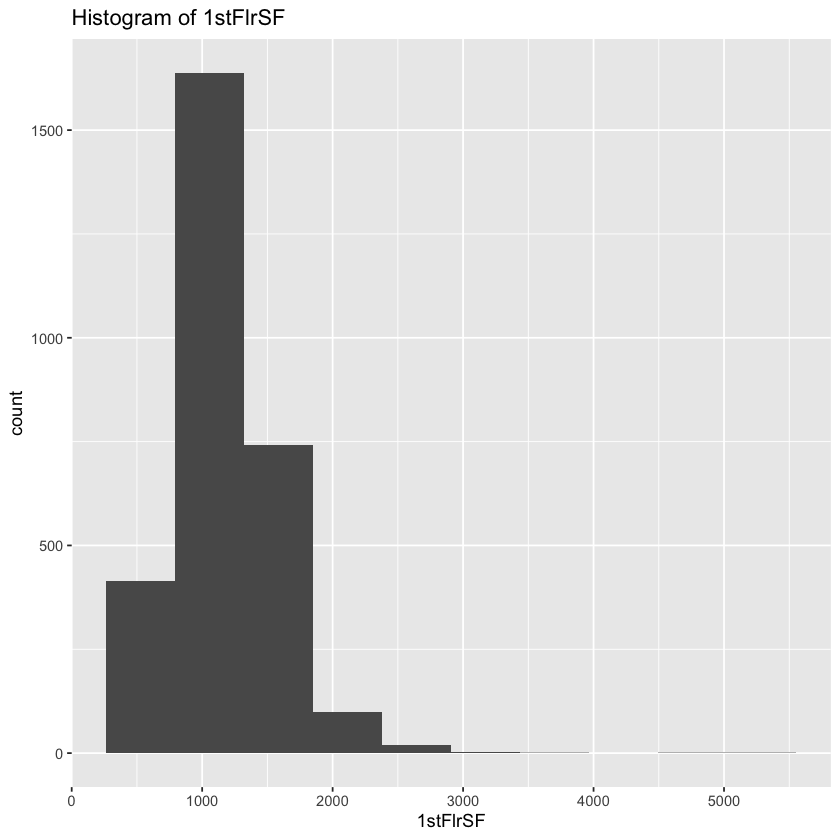

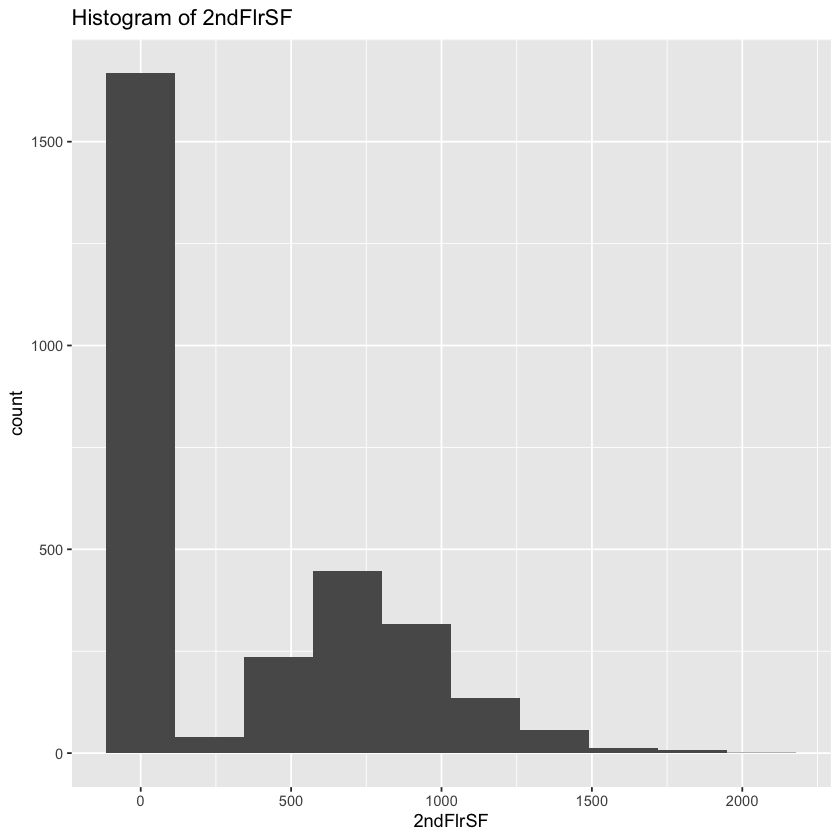

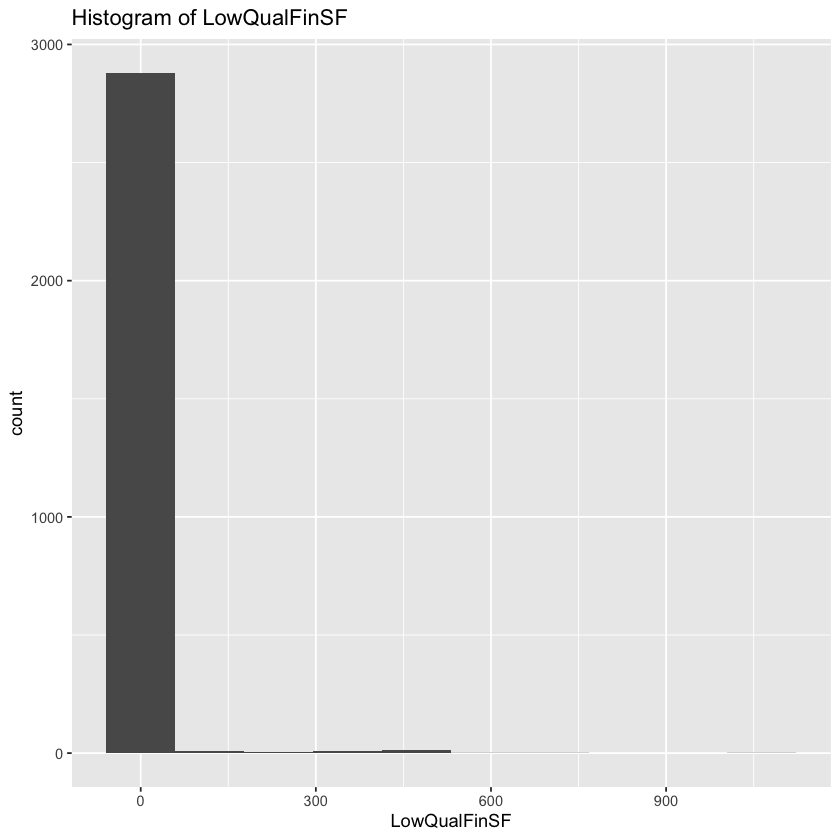

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


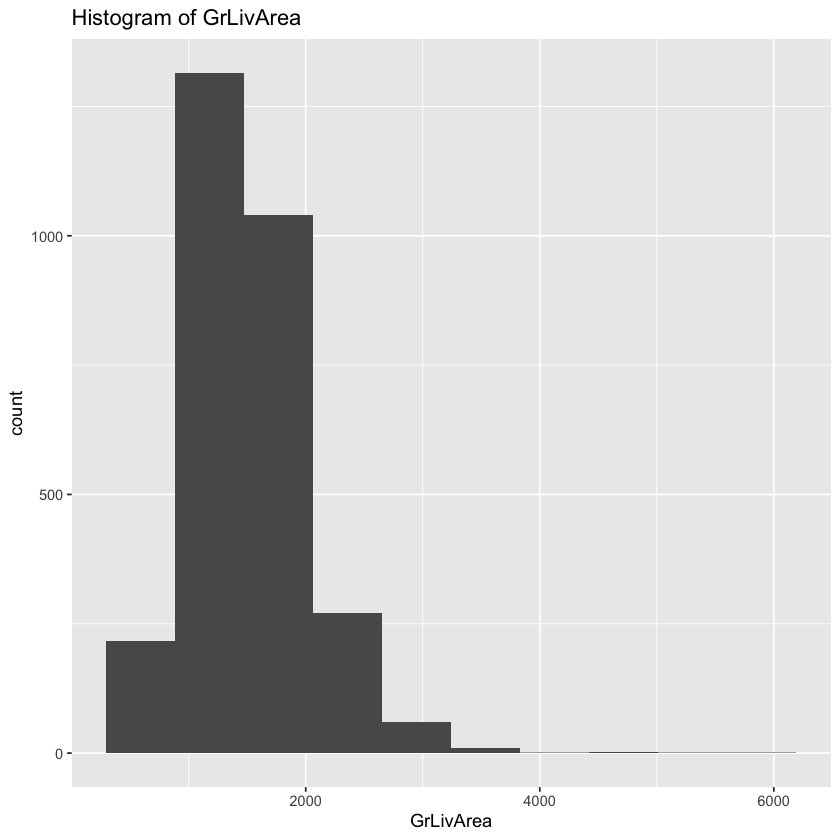

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


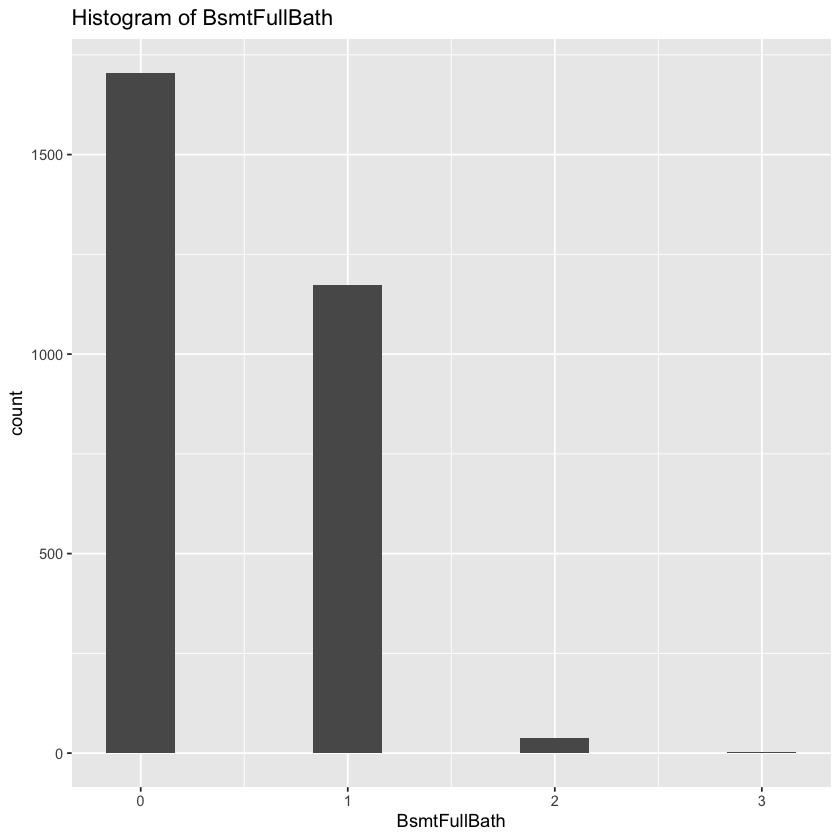

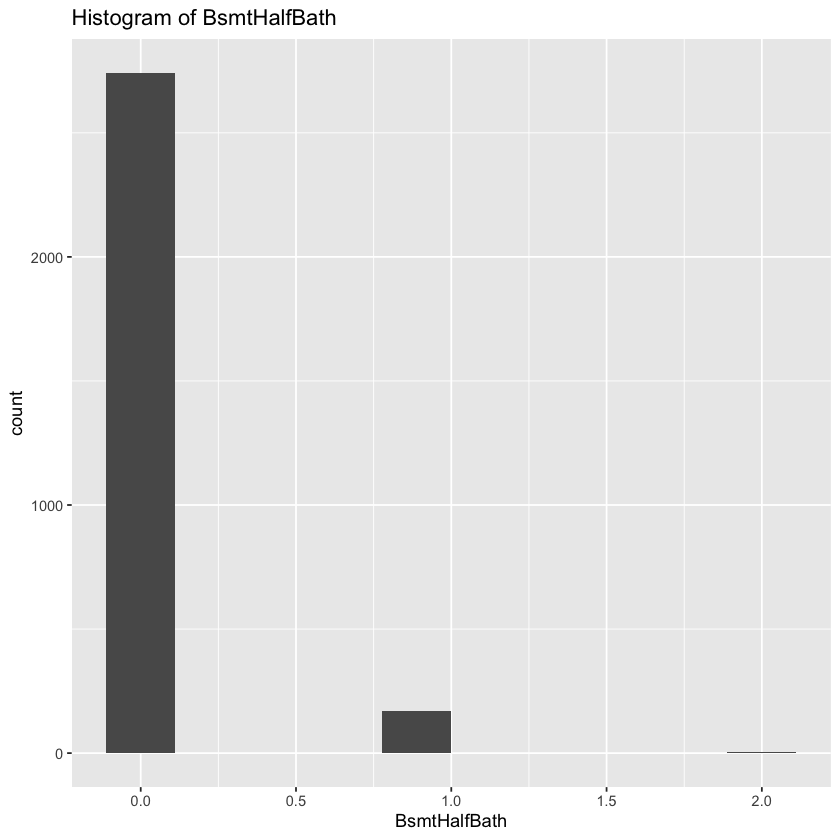

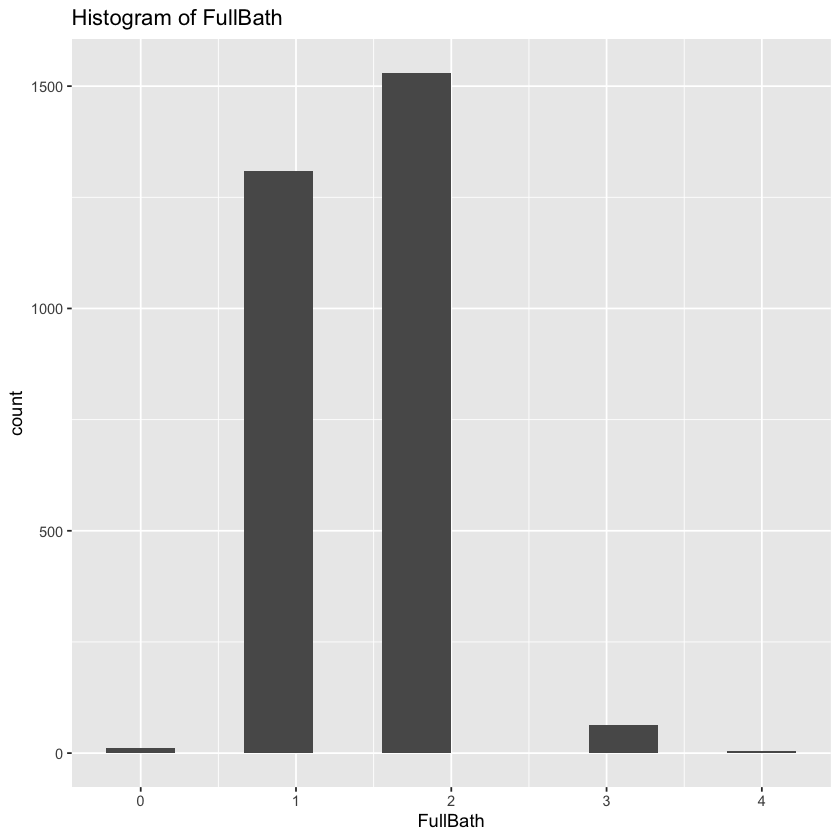

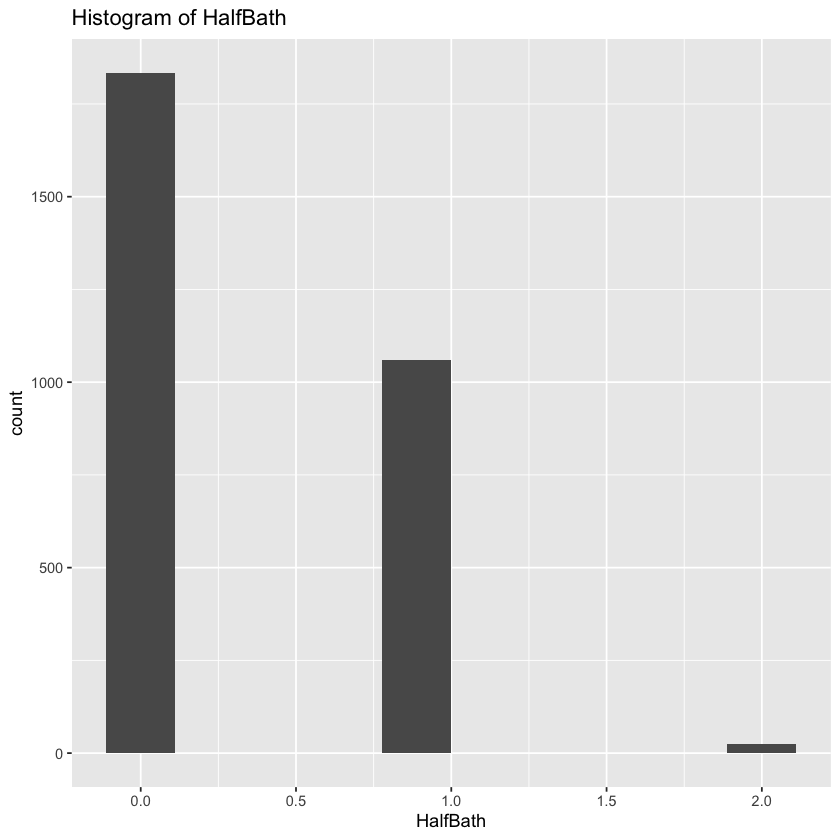

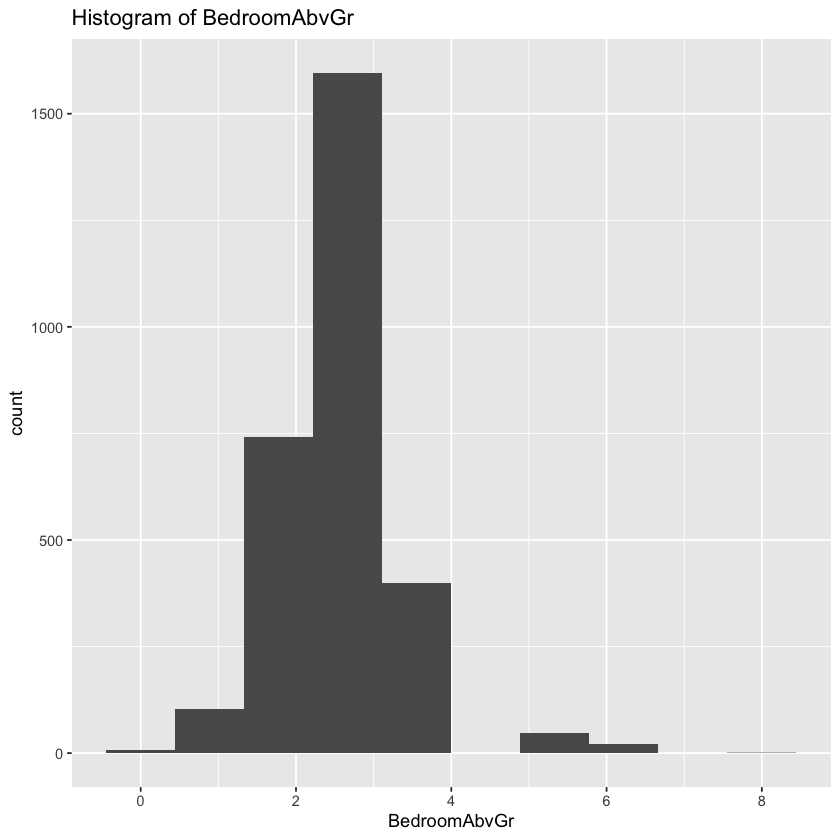

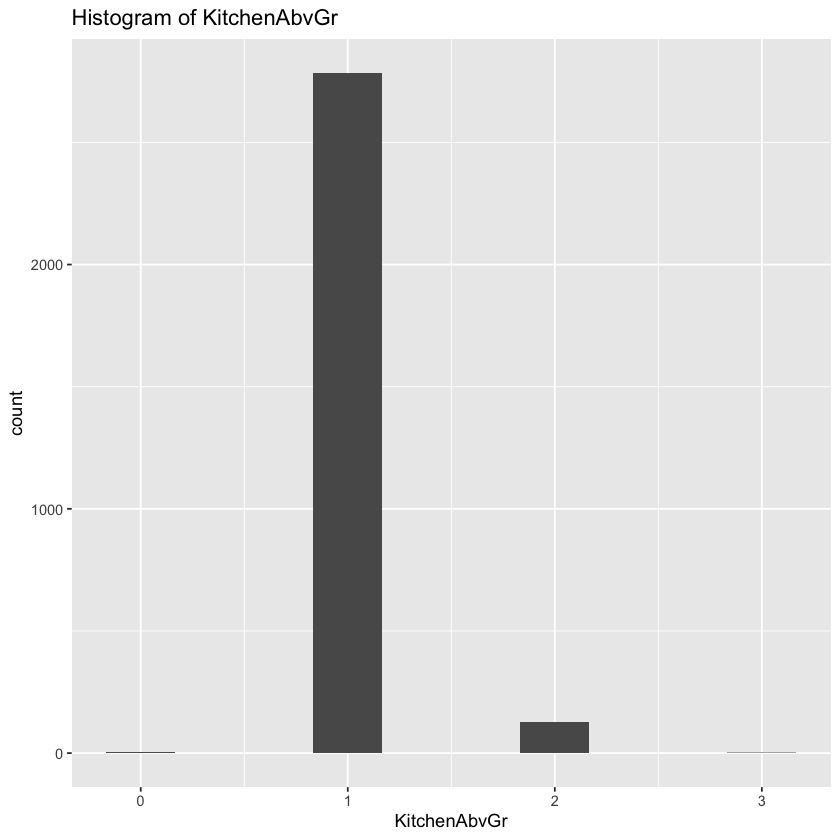

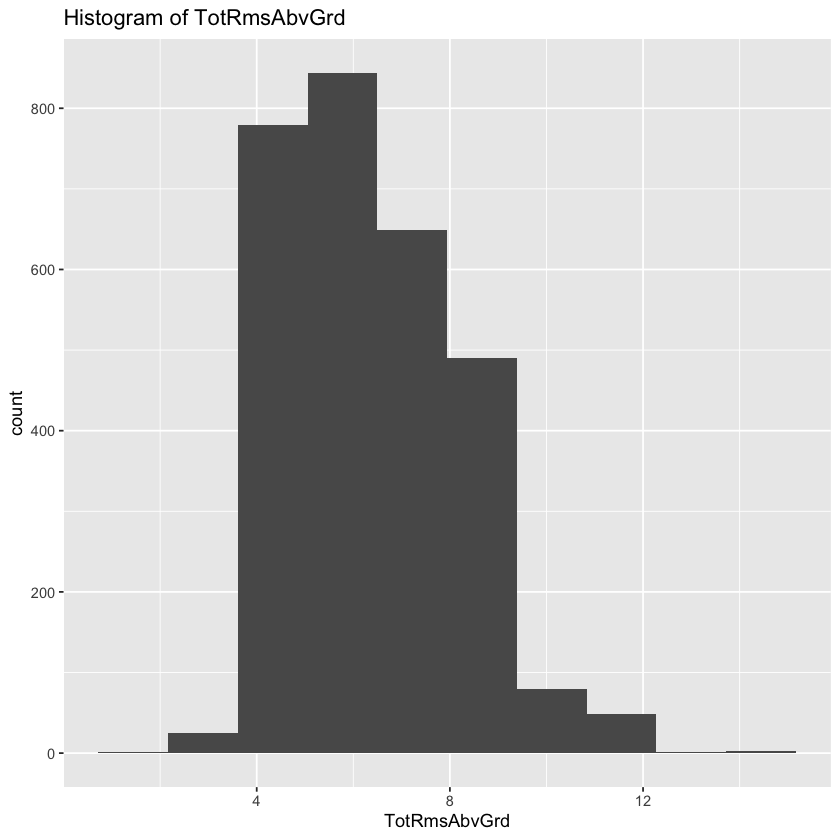

Warning message:
“Removed 159 rows containing non-finite values (stat_bin).”


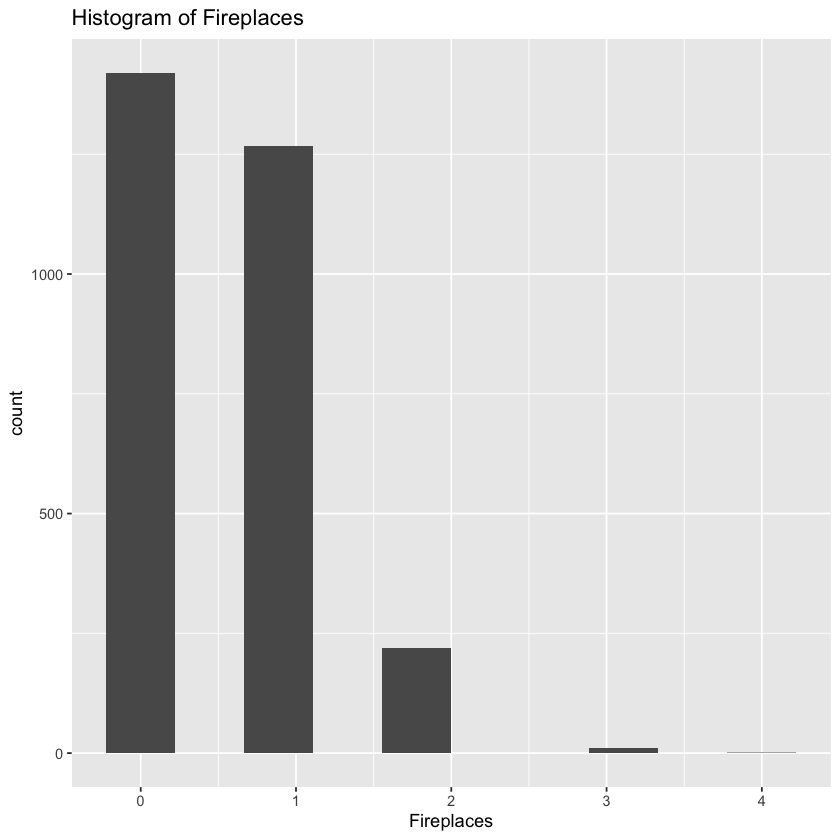

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


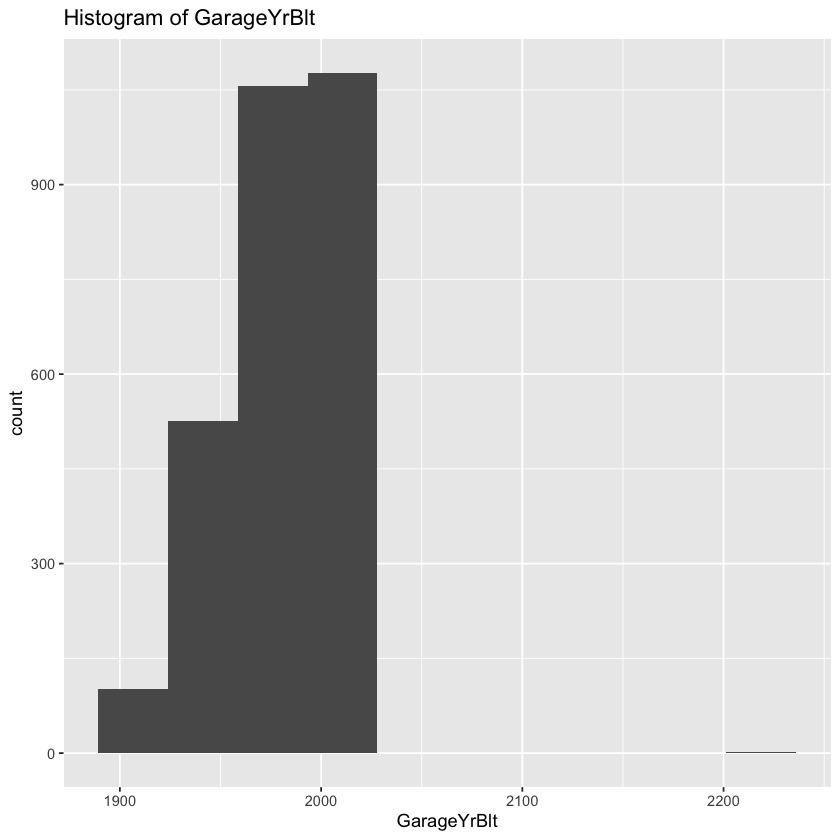

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


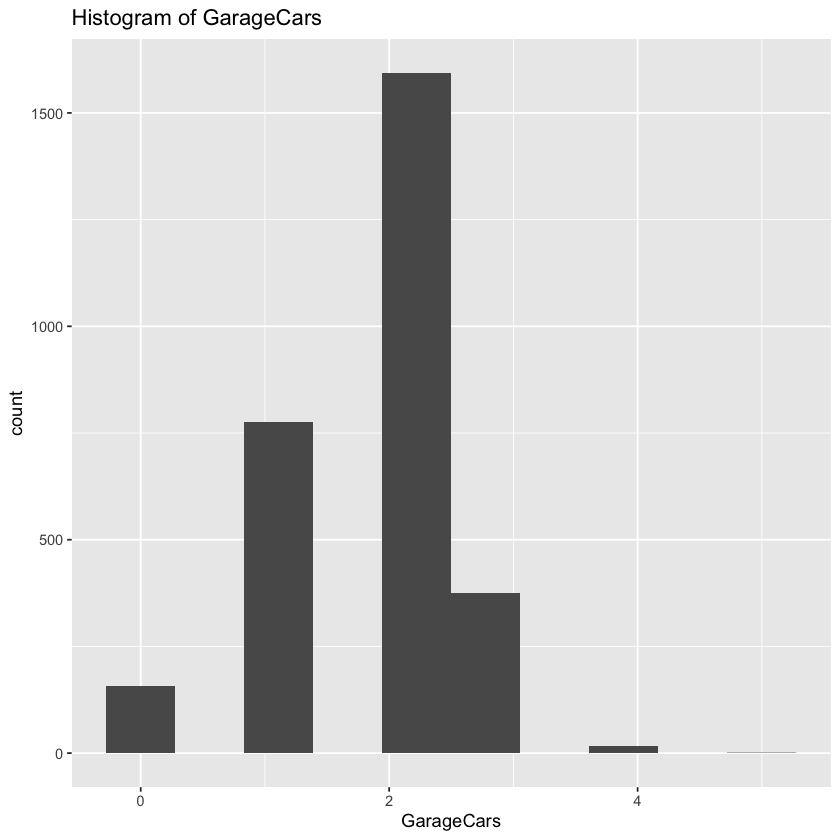

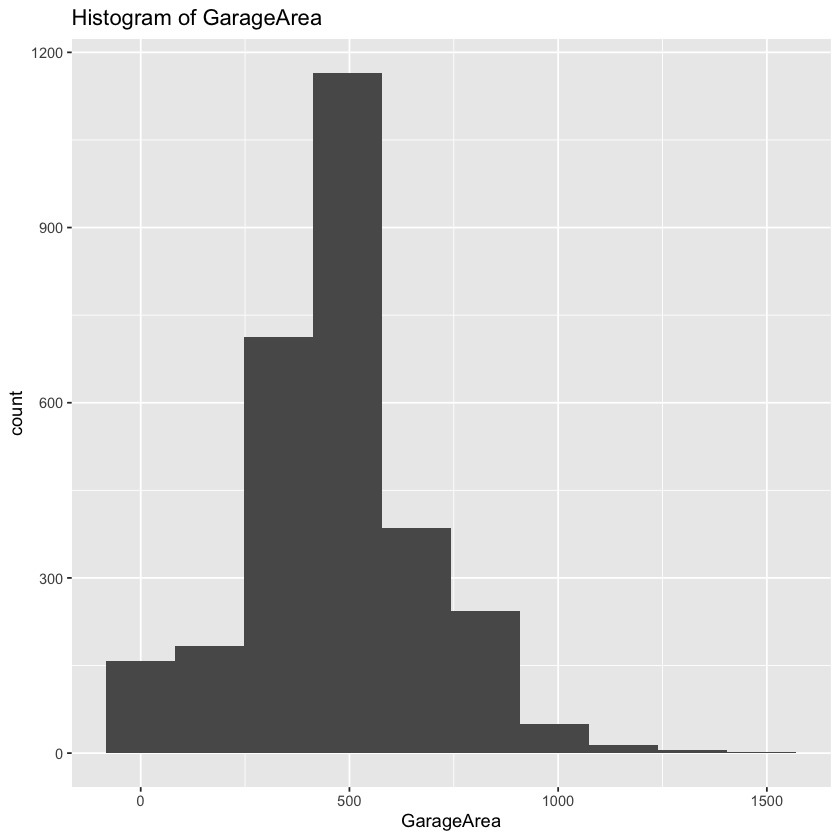

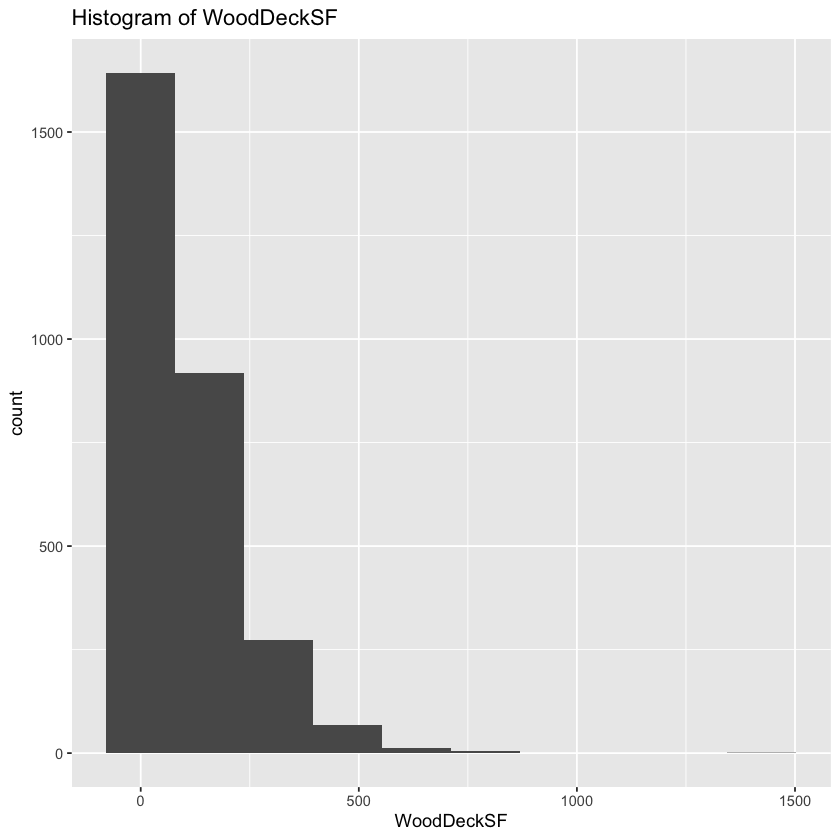

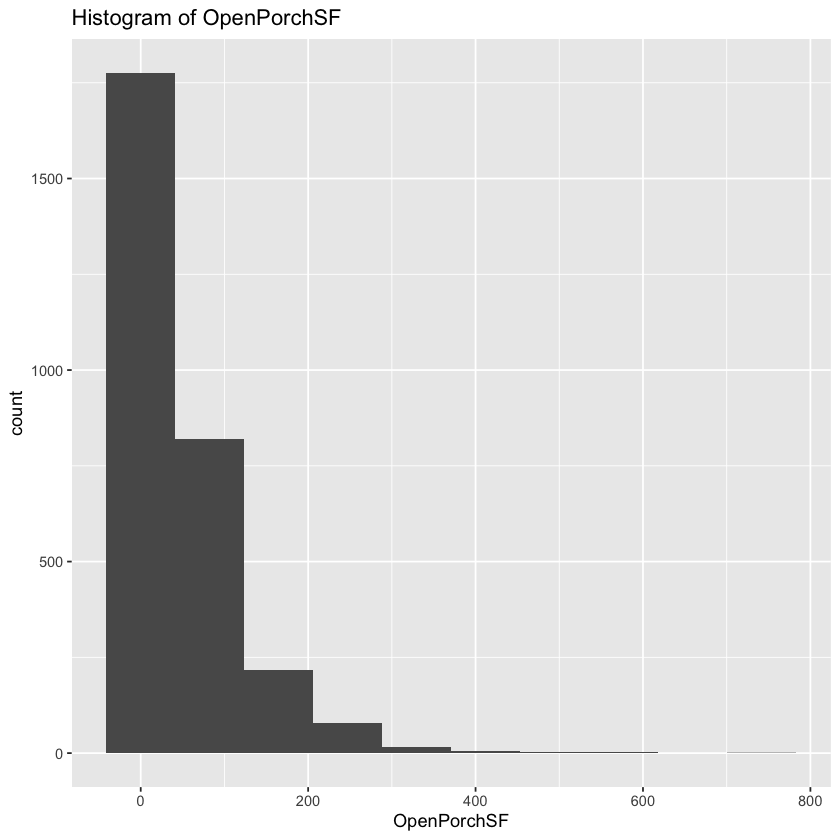

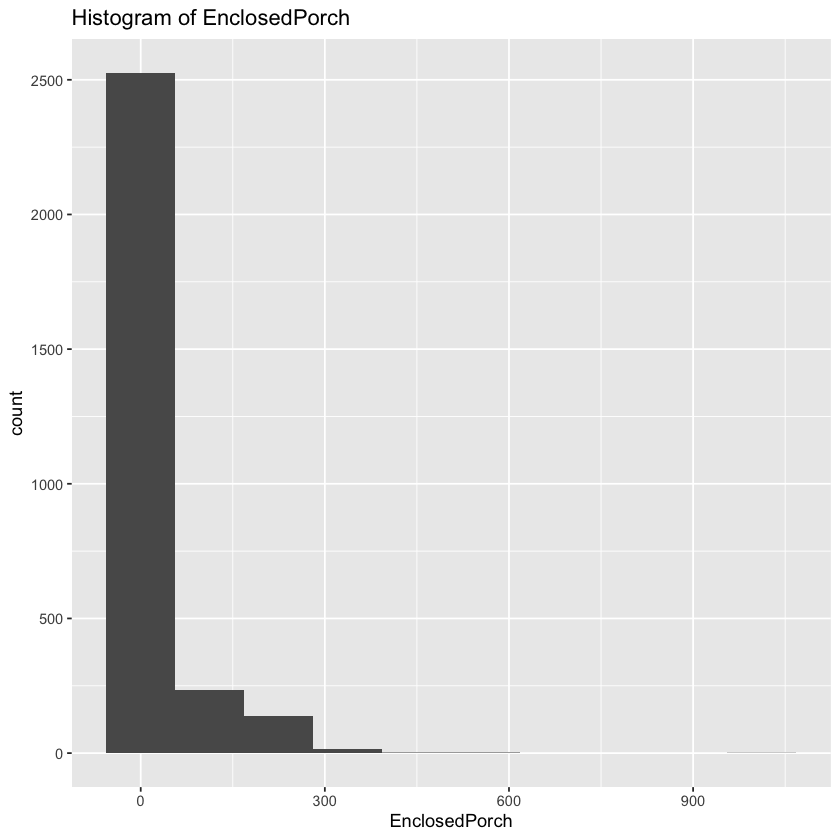

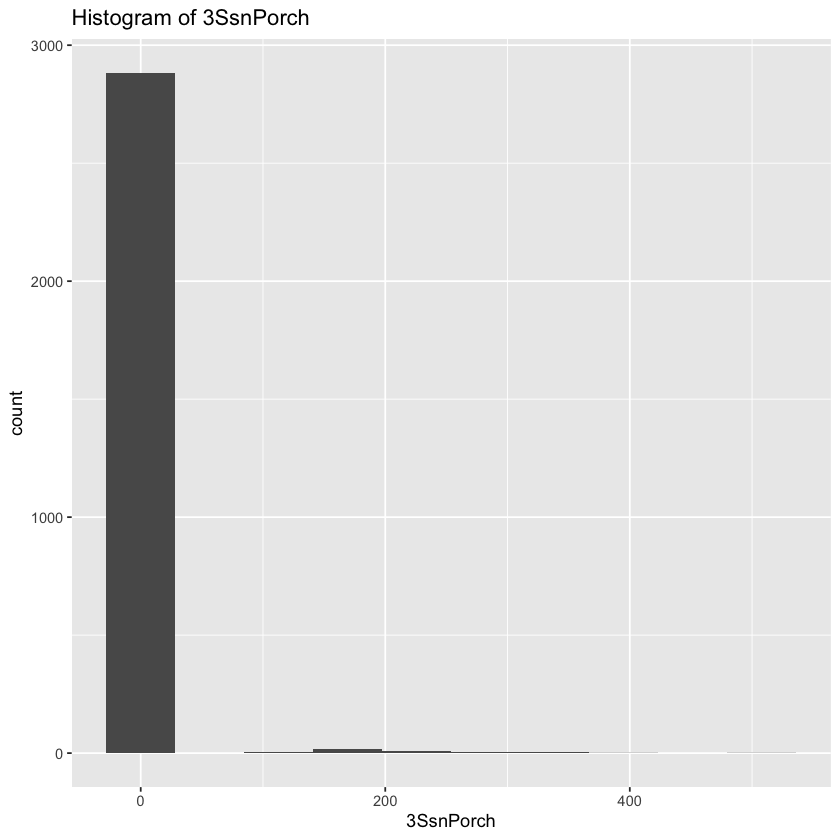

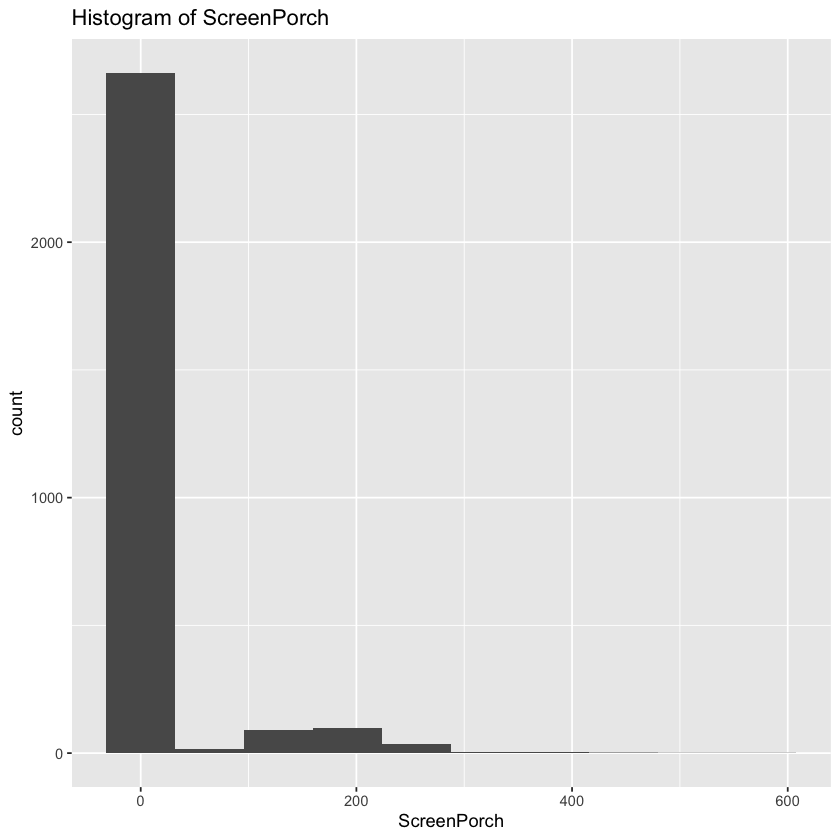

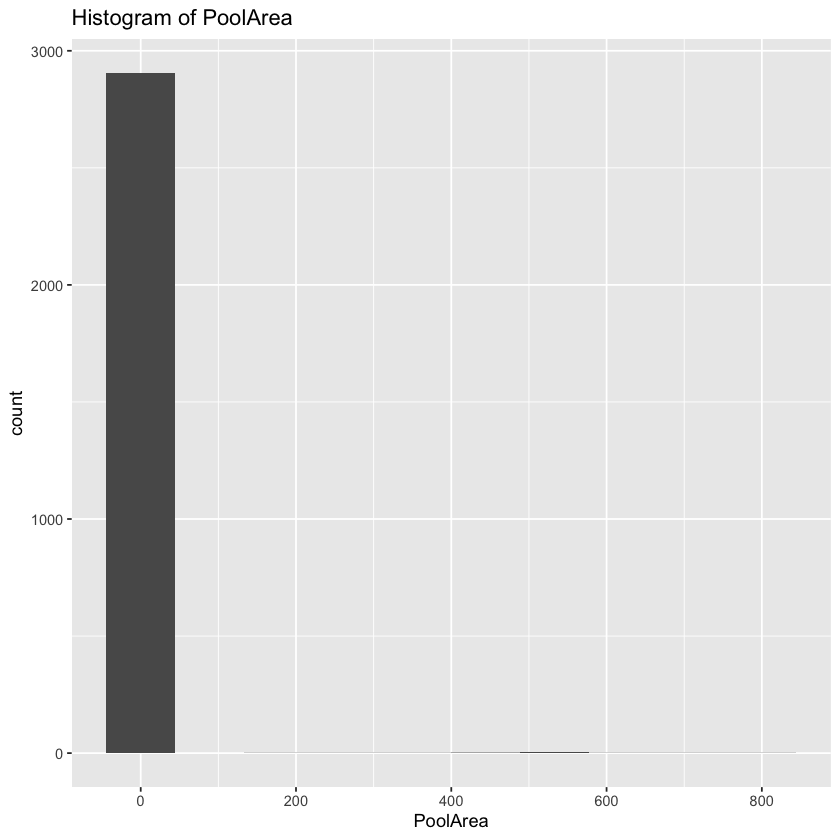

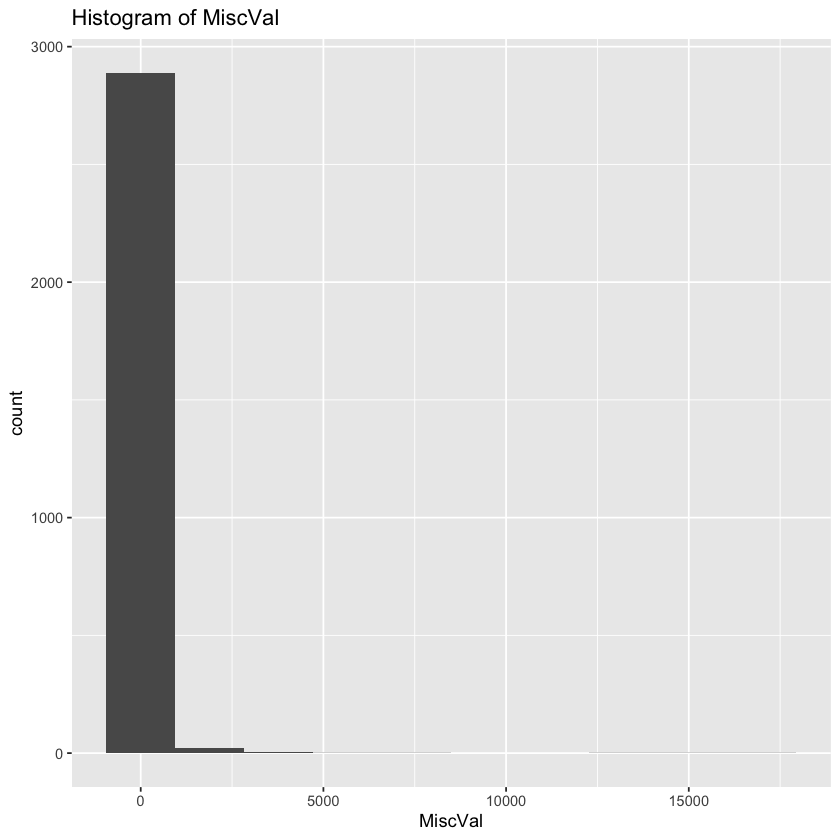

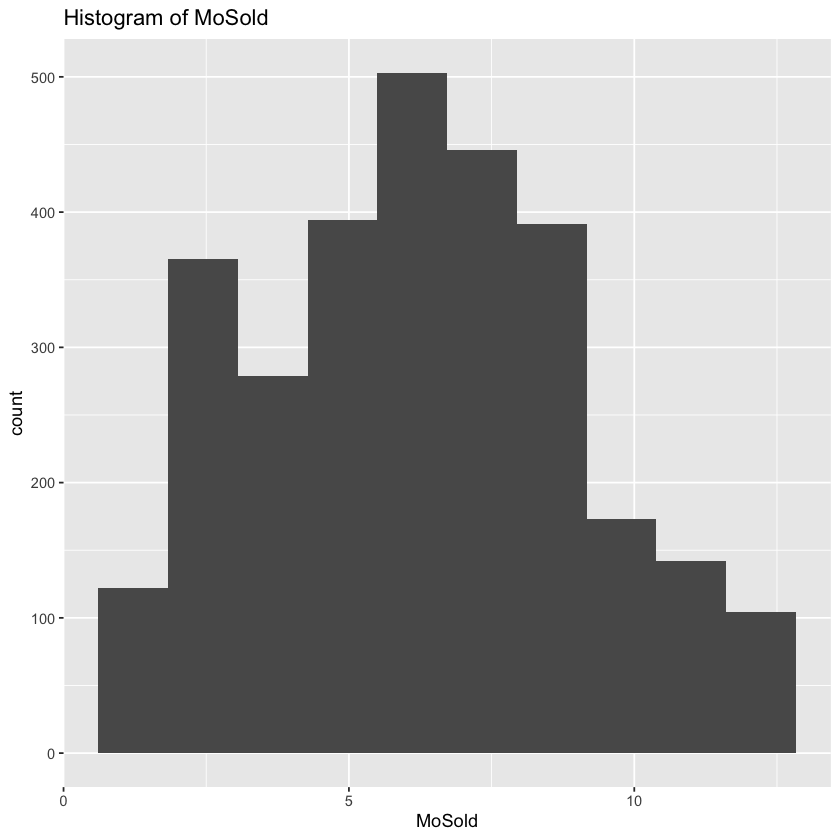

Warning message:
“Removed 1459 rows containing non-finite values (stat_bin).”


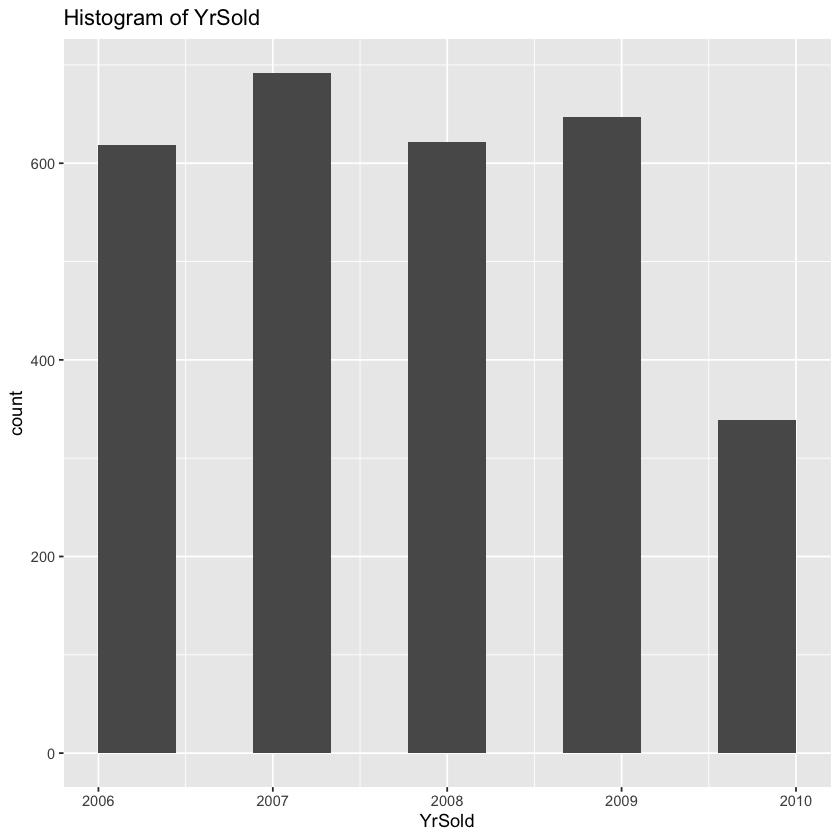

ERROR: Error in grid.arrange(grobs = plots, ncol = 5): could not find function "grid.arrange"


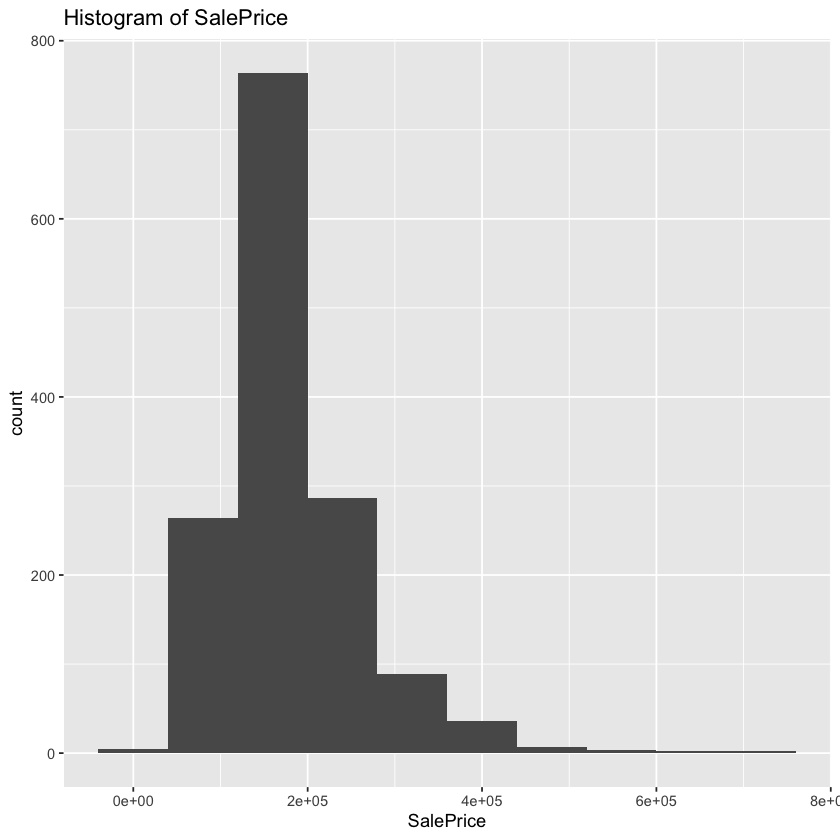

In [8]:
for (col in names(data)) {
  if (is.numeric(data[[col]])) {
    print(ggplot(data, aes(x = .data[[col]])) +
      geom_histogram(bins = 10) +
      ggtitle(paste("Histogram of", col)))
  }
}

# Arrange the plots in a grid
grid.arrange(grobs = plots, ncol = 5)